In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def kmeans(data, n, m, k, plt):
    # 获取4个随机数
    rarray = np.random.random(size=k)
    # 乘以数据集大小——>数据集中随机的4个点
    rarray = np.floor(rarray*n)
    # 转为int
    rarray = rarray.astype(int)
    print('数据集中随机索引', rarray)
    # 随机取数据集中的4个点作为初始中心点
    center = data[rarray]
    # 测试比较偏、比较集中的点，效果依然完美，测试需要删除以上代码
    # center = np.array([[4.6,-2.5],[4.4,-1.7],[4.3,-0.7],[4.8,-1.1]])
    # 1行80列的0数组，标记每个样本所属的类(k[i])
    cls = np.zeros([n], np.int)
    print('初始center=\n', center)
    run = True
    time = 0
    while run:
        time = time + 1
        for i in range(n):
            # 求差
            tmp = data[i] - center
            # 求平方
            tmp = np.square(tmp)
            # axis=1表示按行求和
            tmp = np.sum(tmp, axis=1)
            # 取最小（最近）的给该点“染色”（标记每个样本所属的类(k[i])）
            cls[i] = np.argmin(tmp)
        # 如果没有修改各分类中心点，就结束循环
        run = False
        # 计算更新每个类的中心点
        for i in range(k):
            # 找到属于该类的所有样本
            club = data[cls==i]
            # axis=0表示按列求平均值，计算出新的中心点
            newcenter = np.mean(club, axis=0)
            # 如果新旧center的差距很小，看做他们相等，否则更新之。run置true，再来一次循环
            ss = np.abs(center[i]-newcenter)
            if np.sum(ss, axis=0) > 1e-4:
                center[i] = newcenter
                run = True
        print('new center=\n', center)
    print('程序结束，迭代次数：', time)
    # 按类打印图表，因为每打印一次，颜色都不一样，所以可区分出来
    for i in range(k):
        club = data[cls == i]
        showtable(club, plt)
    # 打印最后的中心点
    showtable(center, plt)

In [3]:
def showtable(data, plt):
    x = data.T[0]
    y = data.T[1]
    plt.scatter(x, y)

数据集中随机索引 [ 1  8 67 61]
初始center=
 [[-3.453687  3.424321]
 [ 2.668759  1.594842]
 [-2.651229 -3.103198]
 [-2.562539  2.884438]]
new center=
 [[-3.67036525  3.311776  ]
 [ 2.84688416  0.48771357]
 [-2.79969165 -3.01951378]
 [-2.15933763  2.65627544]]
new center=
 [[-3.649876    2.955743  ]
 [ 2.8462177   0.2615863 ]
 [-3.01169468 -3.01238673]
 [-1.81827806  2.88494975]]
new center=
 [[-3.48664243  2.77252571]
 [ 2.96765829 -0.04151062]
 [-3.01169468 -3.01238673]
 [-1.08974465  3.09531088]]
new center=
 [[-3.17006745  2.60393509]
 [ 3.01706084 -0.27140413]
 [-3.01169468 -3.01238673]
 [-0.24713193  3.37721667]]
new center=
 [[-2.84017553  2.6309902 ]
 [ 3.10012512 -1.31169504]
 [-3.01169468 -3.01238673]
 [ 1.28154061  3.5524515 ]]
new center=
 [[-2.54951105  2.75812458]
 [ 2.8692781  -2.54779119]
 [-3.38237045 -2.9473363 ]
 [ 2.3772111   3.2195035 ]]
new center=
 [[-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]
new center=
 [[-2.4

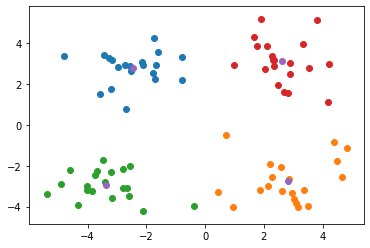

In [4]:
if __name__ == "__main__":
    csv = pd.read_csv("C:/Users/Jiateng/Desktop/CODE/Python/KmeansData.txt")
    # 打印原始数据
    # showtable(csv.values, plt)
    kmeans(csv.values, 80, 2, 4, plt)
    plt.show()